In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
#prepare data for analysis
df=pd.read_csv("C://Users//chand//OneDrive//Documents//learn//git//fullstack_python//assignment-51//Sales.csv")

In [7]:
df

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TX,Seniors,14,35000
7556,30-Dec-20,Evening,TX,Kids,15,37500
7557,30-Dec-20,Evening,TX,Men,15,37500
7558,30-Dec-20,Evening,TX,Women,11,27500


In [8]:
#Print the DataFrame df and determine its dimensions
df.shape

(7560, 6)

In [9]:
df.size

45360

In [10]:
#Check for missing values in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [11]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [12]:
#Normalize Data for Analysis
#Create a new DataFrame called df_dataonly from the existing df object
df_dataonly=df['Unit'],df['Sales']

In [13]:
df_dataonly

(0        8
 1        8
 2        4
 3       15
 4        3
         ..
 7555    14
 7556    15
 7557    15
 7558    11
 7559    13
 Name: Unit, Length: 7560, dtype: int64,
 0       20000
 1       20000
 2       10000
 3       37500
 4        7500
         ...  
 7555    35000
 7556    37500
 7557    37500
 7558    27500
 7559    32500
 Name: Sales, Length: 7560, dtype: int64)

In [14]:
#Create a normalize object
normalize=MinMaxScaler()

In [15]:
normalize_data = normalize.fit_transform(df_dataonly)

In [16]:
normalize_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [17]:
normalize_data[:,[0]]

array([[0.],
       [1.]])

In [18]:
#Check the min and max values of each column. 
unit_min=normalize_data[:,[0]].min()
unit_min
print(f"unit's minimum normalize scale is: {unit_min}")

unit's minimum normalize scale is: 0.0


In [19]:
unit_max=normalize_data[:,[0]].max()
unit_max
print(f"unit's maximum narmalize scale is : {unit_max}")

unit's maximum narmalize scale is : 1.0000000000000002


In [20]:
sales_min=normalize_data[:,[1]].min()
sales_min
print(f"sale's minimum normalize scale is: {sales_min}")

sale's minimum normalize scale is: 0.0


In [21]:
sales_max=normalize_data[:,[1]].max()
sales_max
print(f"sale's maximum normalize scale is:{sales_max}")

sale's maximum normalize scale is:1.0000000000000002


In [22]:
#Visualize Overall Trends
df['Date'].unique()

array(['01-Oct-20', '02-Oct-20', '03-Oct-20', '04-Oct-20', '05-Oct-20',
       '06-Oct-20', '07-Oct-20', '08-Oct-20', '09-Oct-20', '10-Oct-20',
       '11-Oct-20', '12-Oct-20', '13-Oct-20', '14-Oct-20', '15-Oct-20',
       '16-Oct-20', '17-Oct-20', '18-Oct-20', '19-Oct-20', '20-Oct-20',
       '21-Oct-20', '22-Oct-20', '23-Oct-20', '24-Oct-20', '25-Oct-20',
       '26-Oct-20', '27-Oct-20', '28-Oct-20', '29-Oct-20', '30-Oct-20',
       '01-Nov-20', '02-Nov-20', '03-Nov-20', '04-Nov-20', '05-Nov-20',
       '06-Nov-20', '07-Nov-20', '08-Nov-20', '09-Nov-20', '10-Nov-20',
       '11-Nov-20', '12-Nov-20', '13-Nov-20', '14-Nov-20', '15-Nov-20',
       '16-Nov-20', '17-Nov-20', '18-Nov-20', '19-Nov-20', '20-Nov-20',
       '21-Nov-20', '22-Nov-20', '23-Nov-20', '24-Nov-20', '25-Nov-20',
       '26-Nov-20', '27-Nov-20', '28-Nov-20', '29-Nov-20', '30-Nov-20',
       '01-Dec-20', '02-Dec-20', '03-Dec-20', '04-Dec-20', '05-Dec-20',
       '06-Dec-20', '07-Dec-20', '08-Dec-20', '09-Dec-20', '10-D

In [23]:
unit_date=df.groupby('Date')['Unit'].sum()

In [24]:
unit_date

Date
01-Dec-20    1786
01-Nov-20    1208
01-Oct-20    1488
02-Dec-20    1826
02-Nov-20    1090
             ... 
29-Nov-20    1294
29-Oct-20    1529
30-Dec-20    1836
30-Nov-20    1214
30-Oct-20    1521
Name: Unit, Length: 90, dtype: int64

Text(0, 0.5, 'Unit')

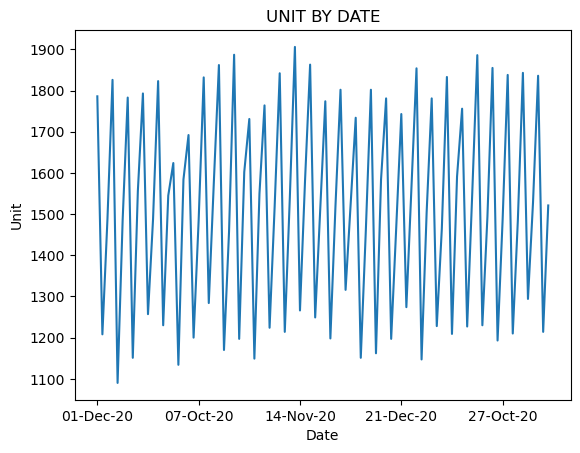

In [25]:
unit_date.plot(kind='line')
plt.title("UNIT BY DATE")
plt.ylabel("Unit")

In [26]:
sale_date=df.groupby('Date')['Sales'].sum()

In [27]:
sale_date

Date
01-Dec-20    4465000
01-Nov-20    3020000
01-Oct-20    3720000
02-Dec-20    4565000
02-Nov-20    2725000
              ...   
29-Nov-20    3235000
29-Oct-20    3822500
30-Dec-20    4590000
30-Nov-20    3035000
30-Oct-20    3802500
Name: Sales, Length: 90, dtype: int64

Text(0, 0.5, 'Sales')

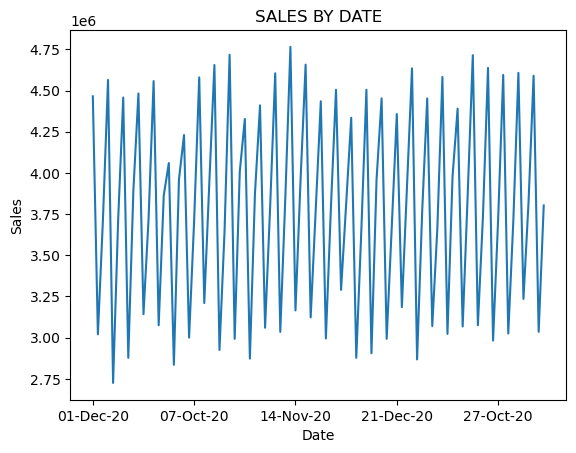

In [28]:
sale_date.plot(kind='line')
plt.title("SALES BY DATE")
plt.ylabel("Sales")

In [29]:
#analyze monthly data
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\chand\AppData\Local\Temp\ipykernel_13480\3303413195.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [30]:
df.set_index(['Date'],inplace = True)

In [31]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TX,Seniors,14,35000
2020-12-30,Evening,TX,Kids,15,37500
2020-12-30,Evening,TX,Men,15,37500


In [32]:
monthly_data=df[['Unit','Sales']].resample('ME').sum()

In [33]:
monthly_data

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


In [34]:
#get the sub-DataFrame, using the loc feature of DataFrame, and pass the range by date. 
#get octomber data
octomber_df=df.loc['2020-10-01' : '2020-10-31']
octomber_df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-10-30,Afternoon,TX,Seniors,12,30000
2020-10-30,Evening,TX,Kids,15,37500
2020-10-30,Evening,TX,Men,7,17500


In [35]:
#get november data
nov_df=df.loc['2020-11-01' : '2020-11-30']

In [36]:
nov_df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-11-01,Morning,WA,Kids,4,10000
2020-11-01,Morning,WA,Men,6,15000
2020-11-01,Morning,WA,Women,4,10000
2020-11-01,Morning,WA,Seniors,7,17500
2020-11-01,Afternoon,WA,Kids,8,20000
...,...,...,...,...,...
2020-11-30,Afternoon,TX,Seniors,9,22500
2020-11-30,Evening,TX,Kids,9,22500
2020-11-30,Evening,TX,Men,10,25000


In [37]:
#get december data
dec_df=df.loc['2020-12-01' : '2020-12-31']

In [38]:
dec_df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-12-01,Morning,WA,Kids,9,22500
2020-12-01,Morning,WA,Men,11,27500
2020-12-01,Morning,WA,Women,15,37500
2020-12-01,Morning,WA,Seniors,13,32500
2020-12-01,Afternoon,WA,Kids,13,32500
...,...,...,...,...,...
2020-12-30,Afternoon,TX,Seniors,14,35000
2020-12-30,Evening,TX,Kids,15,37500
2020-12-30,Evening,TX,Men,15,37500


In [39]:
#Describe Data for entire dataframe
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [40]:
#describe data for each month
octomber_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,18.141270,45353.174603
std,11.944521,29861.302213
min,3.000000,7500.000000
25%,9.000000,22500.000000
50%,14.000000,35000.000000
75%,27.000000,67500.000000
max,50.000000,125000.000000


In [41]:
nov_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,14.394048,35985.119048
std,10.946470,27366.175823
min,2.000000,5000.000000
25%,6.000000,15000.000000
50%,10.000000,25000.000000
75%,22.000000,55000.000000
max,45.000000,112500.000000


In [42]:
dec_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,21.480952,53702.380952
std,14.554181,36385.451298
min,5.000000,12500.000000
25%,10.000000,25000.000000
50%,15.000000,37500.000000
75%,31.000000,77500.000000
max,65.000000,162500.000000


In [43]:
#extract month
df['Month'] = df.index.strftime('%B')

Text(0.5, 1.0, 'Distribution of unit per month')

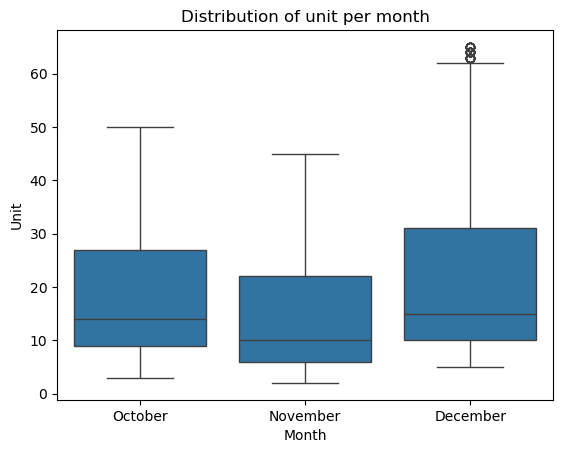

In [44]:
#unit analysis
sns.boxplot(x='Month',y='Unit',data=df)
plt.title('Distribution of unit per month')

Text(0.5, 0, 'Month')

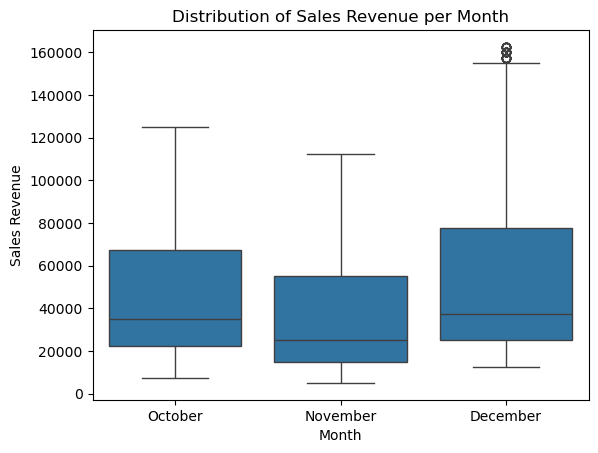

In [45]:
#sales analysis
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Distribution of Sales Revenue per Month')
plt.ylabel('Sales Revenue')
plt.xlabel('Month')

In [46]:
#group by month
df
monthly_data=monthly_data.reset_index()
monthly_data

,Date,Unit,Sales
0,2020-10-31,45716,114290000
1,2020-11-30,36273,90682500
2,2020-12-31,54132,135330000


In [87]:
#to check monthly data is series or datafarame
print(type(monthly_data))

<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Sales')

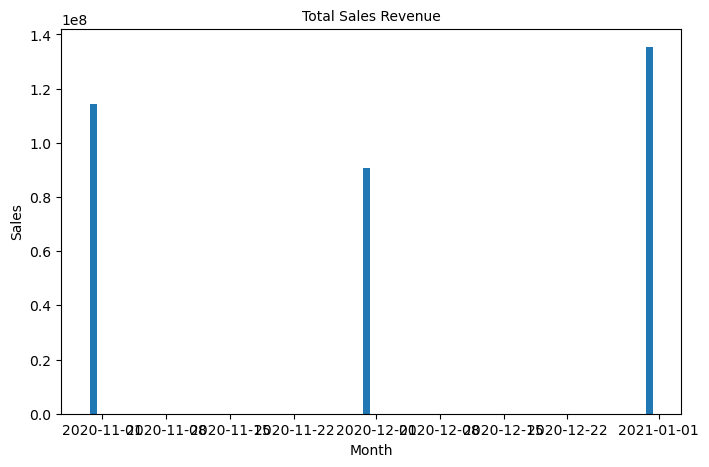

In [47]:
#Sales numbers for October, November, and December
plt.figure(figsize=(8, 5))
plt.bar(monthly_data['Date'],monthly_data['Sales'])
plt.title('Total Sales Revenue', fontsize=10)
plt.xlabel('Month')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

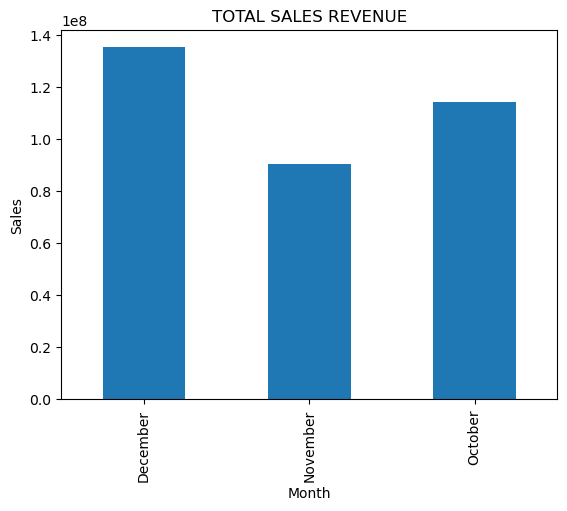

In [91]:
month_sale.plot(kind='bar')
plt.title("TOTAL SALES REVENUE")
plt.ylabel("Sales")

In [92]:
#monthly unit sold
monthly_unit=df.groupby('Month')['Unit'].sum()

In [93]:
monthly_unit

Month
December    54132
November    36273
October     45716
Name: Unit, dtype: int64

<Axes: xlabel='Month'>

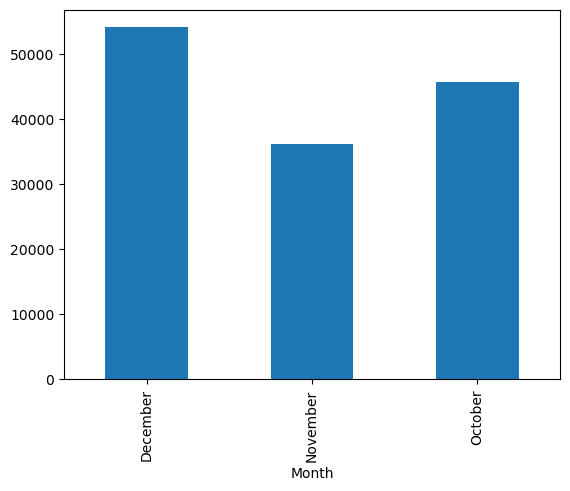

In [94]:
monthly_unit.plot(kind='bar')


Text(0, 0.5, 'Sales Revenue')

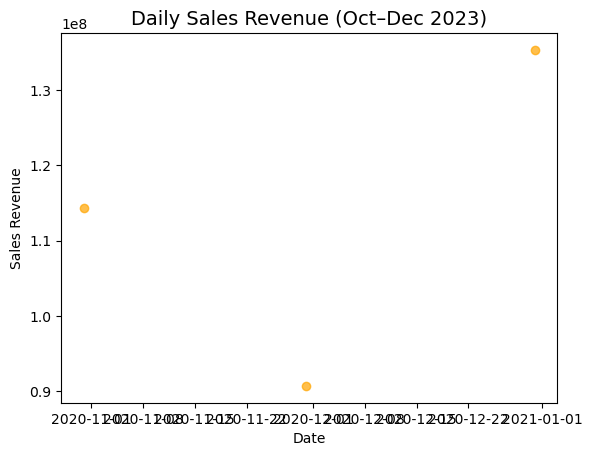

In [49]:
#Consolidated 3-month sales plot
plt.scatter(monthly_data['Date'], monthly_data['Sales'], color='orange', alpha=0.7)
plt.title('Daily Sales Revenue (Oct–Dec 2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales Revenue')

In [50]:
#Obtain a Comprehensive Snapshot
df.describe()


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [51]:
print(f"total unit sold and sale by month :\n {monthly_data}")

total unit sold and sale by month :
         Date   Unit      Sales
0 2020-10-31  45716  114290000
1 2020-11-30  36273   90682500
2 2020-12-31  54132  135330000


In [52]:
#highest and lowest value by month on day
#octomber month
highest_sale=octomber_df.max()
print(f"highest sale in octomber month is:\n  {highest_sale}")


highest sale in octomber month is:
  Time      Morning
State          TX
Group       Women
Unit           50
Sales      125000
dtype: object


In [53]:
lowest_sale=octomber_df.min()
print(f"lowest sale in octomber month is :\n {lowest_sale}")

lowest sale in octomber month is :
 Time      Afternoon
State            WA
Group          Kids
Unit              3
Sales          7500
dtype: object


In [54]:
#november month
highest_sale=nov_df.max()
print(f"highest sale in november is:\n  {highest_sale}")


highest sale in november is:
  Time      Morning
State          TX
Group       Women
Unit           45
Sales      112500
dtype: object


In [55]:
#lowest sale
lowest_sale=nov_df.min()
print(f"lowest sale in november month is :\n {lowest_sale}")

lowest sale in november month is :
 Time      Afternoon
State            WA
Group          Kids
Unit              2
Sales          5000
dtype: object


In [56]:
#december month
highest_sale=dec_df.max()
print(f"highest december sale is:\n  {highest_sale}")


highest december sale is:
  Time      Morning
State          TX
Group       Women
Unit           65
Sales      162500
dtype: object


In [57]:
highest_sale=dec_df.min()
print(f"lowest december sale is:\n  {highest_sale}")


lowest december sale is:
  Time      Afternoon
State            WA
Group          Kids
Unit              5
Sales         12500
dtype: object


In [58]:
#total average sale is
average=df['Sales'].mean()


In [59]:
average

45013.5582010582

In [60]:
#Analyze Statewise Sales in the United States
df['State'].unique()

array([' WA', 'AZ', 'FL', 'KY', 'CA', 'NY', 'TX'], dtype=object)

In [61]:
state_sale=df.groupby(['State'])['Sales'].sum()
state_sale.sort_values(ascending=False)

State
KY     105565000
NY      74970000
FL      58857500
CA      33417500
TX      22760000
AZ      22580000
 WA     22152500
Name: Sales, dtype: int64

Text(0, 0.5, 'Sales')

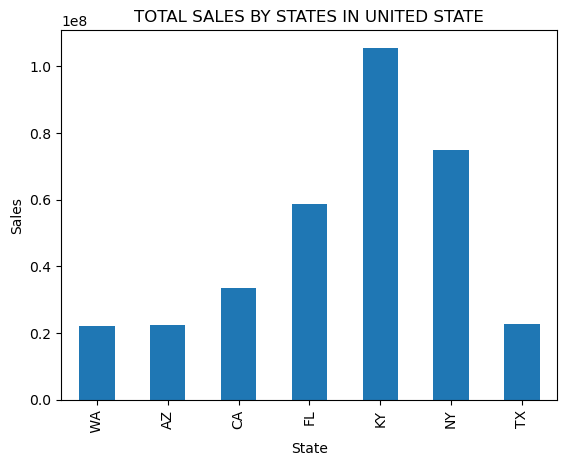

In [62]:
#bar chart
state_sale.plot(kind='bar')
plt.title("TOTAL SALES BY STATES IN UNITED STATE")
plt.ylabel("Sales")

In [63]:
#Conduct Groupwise Analysis
df

,Time,State,Group,Unit,Sales,Month
Date,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,October
2020-10-01,Morning,WA,Men,8,20000,October
2020-10-01,Morning,WA,Women,4,10000,October
2020-10-01,Morning,WA,Seniors,15,37500,October
2020-10-01,Afternoon,WA,Kids,3,7500,October
...,...,...,...,...,...,...
2020-12-30,Afternoon,TX,Seniors,14,35000,December
2020-12-30,Evening,TX,Kids,15,37500,December
2020-12-30,Evening,TX,Men,15,37500,December


In [66]:
#1.time_analysis
timewise=df.groupby('Time')[['Sales','Unit']].sum()
timewise.sort_values(by='Sales',ascending=False)

,Sales,Unit
Time,,
Morning,114207500,45683
Afternoon,114007500,45603
Evening,112087500,44835


In [67]:
#2.group analysis
group_wise=df.groupby('Group')[['Sales','Unit']].sum()

In [68]:
group_wise.sort_values(by='Sales',ascending=False)

,Sales,Unit
Group,,
Men,85750000,34300
Women,85442500,34177
Kids,85072500,34029
Seniors,84037500,33615


In [70]:
#Explore Timewise Analysis
df

,Time,State,Group,Unit,Sales,Month
Date,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,October
2020-10-01,Morning,WA,Men,8,20000,October
2020-10-01,Morning,WA,Women,4,10000,October
2020-10-01,Morning,WA,Seniors,15,37500,October
2020-10-01,Afternoon,WA,Kids,3,7500,October
...,...,...,...,...,...,...
2020-12-30,Afternoon,TX,Seniors,14,35000,December
2020-12-30,Evening,TX,Kids,15,37500,December
2020-12-30,Evening,TX,Men,15,37500,December


In [71]:
month_sale=df.groupby('Month')['Sales'].sum()

In [77]:
month_sale

Month
December    135330000
November     90682500
October     114290000
Name: Sales, dtype: int64

Text(0, 0.5, 'Sales')

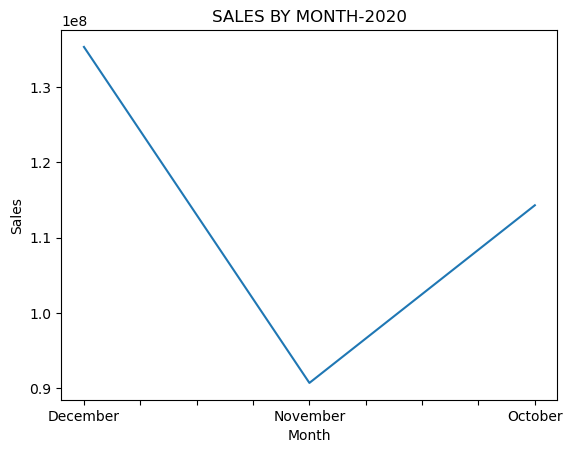

In [81]:
month_sale.plot()
plt.title("SALES BY MONTH-2020")
plt.ylabel("Sales")